#Tugas 1

##Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/ml/dataset/voice.csv'
df_voice = pd.read_csv(data_path)

print("Data Awal:")
df_voice.head()

Mounted at /content/drive
Data Awal:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


##Eksplorasi dan Preprocessing Data

In [ ]:
print("\nInfo Data:")
df_voice.info()

print("\nJumlah Label:")
print(df_voice['label'].value_counts())

labels = {
    'male': 0,
    'female': 1
}
df_voice['label'] = df_voice['label'].map(labels)

X = df_voice.iloc[:, :-1]
y = df_voice.iloc[:, -1]

print("\nData Setelah Encoding Label:")
df_voice.head()


Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


##Split Data dan Standardisasi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Soal 1 & 2 - Model kNN & Fitur Optimal

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("--- Skenario 1: Menggunakan Semua Fitur ---")
knn_all = KNeighborsClassifier(n_neighbors=3)
knn_all.fit(X_train_scaled, y_train)

y_pred_all = knn_all.predict(X_test_scaled)
acc_all = accuracy_score(y_test, y_pred_all)
print(f"Akurasi dengan semua fitur (K=3): {acc_all:.4f}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_all))

print("\n--- Skenario 2: Eksperimen Fitur Terbaik ---")
corr_with_label = df_voice.corr()['label'].abs().sort_values(ascending=False)
print("Korelasi Fitur dengan Label:")
print(corr_with_label[1:6])

top_features = ['meanfun', 'IQR']
X_top = df_voice[top_features]

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.3, random_state=42)
scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_top)
X_test_top_scaled = scaler_top.transform(X_test_top)

knn_top = KNeighborsClassifier(n_neighbors=3)
knn_top.fit(X_train_top_scaled, y_train_top)

y_pred_top = knn_top.predict(X_test_top_scaled)
acc_top = accuracy_score(y_test_top, y_pred_top)
print(f"\nAkurasi dengan 2 fitur terbaik (K=3): {acc_top:.4f}")

--- Skenario 1: Menggunakan Semua Fitur ---
Akurasi dengan semua fitur (K=3): 0.9769
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       499
           1       0.98      0.97      0.98       452

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951


--- Skenario 2: Eksperimen Fitur Terbaik ---
Korelasi Fitur dengan Label:
meanfun    0.833921
IQR        0.618916
Q25        0.511455
sp.ent     0.490552
sd         0.479539
Name: label, dtype: float64

Akurasi dengan 2 fitur terbaik (K=3): 0.9664


##Soal 3 - Nilai K Terbaik

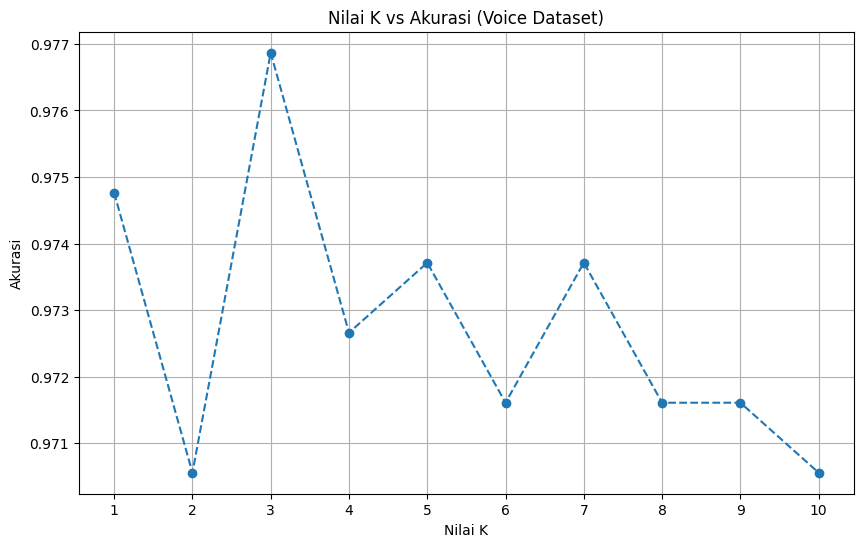

Nilai K terbaik adalah: 3 dengan akurasi 0.9769


In [ ]:
acc = []
k_range = range(1, 11)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, acc, marker='o', linestyle='--')
plt.title('Nilai K vs Akurasi (Voice Dataset)')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_range)
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(acc)]
print(f"Nilai K terbaik adalah: {best_k} dengan akurasi {max(acc):.4f}")